In [1]:
# manipularea datelor
import pandas as pd

# importam metoda de filtarea si statistica f testul ANOVA
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
### nu avem nevoie de date cu constante
### na avem nevoie de date cu variatie mica

### Univariate Filter selection

In [2]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y= True, as_frame=True)

In [5]:
print(X.shape)

(442, 10)


In [7]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [8]:
selector = SelectKBest(f_classif, k='all')
selector.fit_transform(X, y)

selector.pvalues_

array([2.65040984e-01, 2.89744526e-01, 8.82349355e-08, 5.53028419e-04,
       7.27038512e-01, 8.04006188e-01, 1.79443619e-04, 7.31964898e-04,
       5.74992204e-08, 1.00248679e-01])

In [9]:
selector = SelectKBest(f_classif, k = 5)
X_new = selector.fit_transform(X, y)
X_filtered = pd.DataFrame(selector.transform(X),
                          columns=selector.get_feature_names_out())

X_filtered.head()

,bmi,bp,s3,s4,s5
0,0.061696,0.021872,-0.043401,-0.002592,0.019907
1,-0.051474,-0.026328,0.074412,-0.039493,-0.068332
2,0.044451,-0.005670,-0.032356,-0.002592,0.002861
3,-0.011595,-0.036656,-0.036038,0.034309,0.022688
4,-0.036385,0.021872,0.008142,-0.002592,-0.031988


### Multivariate Filter Selection

In [13]:
# incarcarea setul de date pe imobile
from sklearn.datasets import fetch_openml

x = fetch_openml(name='house_prices', as_frame=True)
df = pd.DataFrame(x.data, columns = x.feature_names)

df['Price'] = x.target

X = df.drop('Price', 1)
y = df['Price']

C:\Users\user\AppData\Local\Temp\ipykernel_32916\2287098596.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('Price', 1)


In [14]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Price
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,250000.0


C:\Users\user\AppData\Local\Temp\ipykernel_32916\1118274627.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


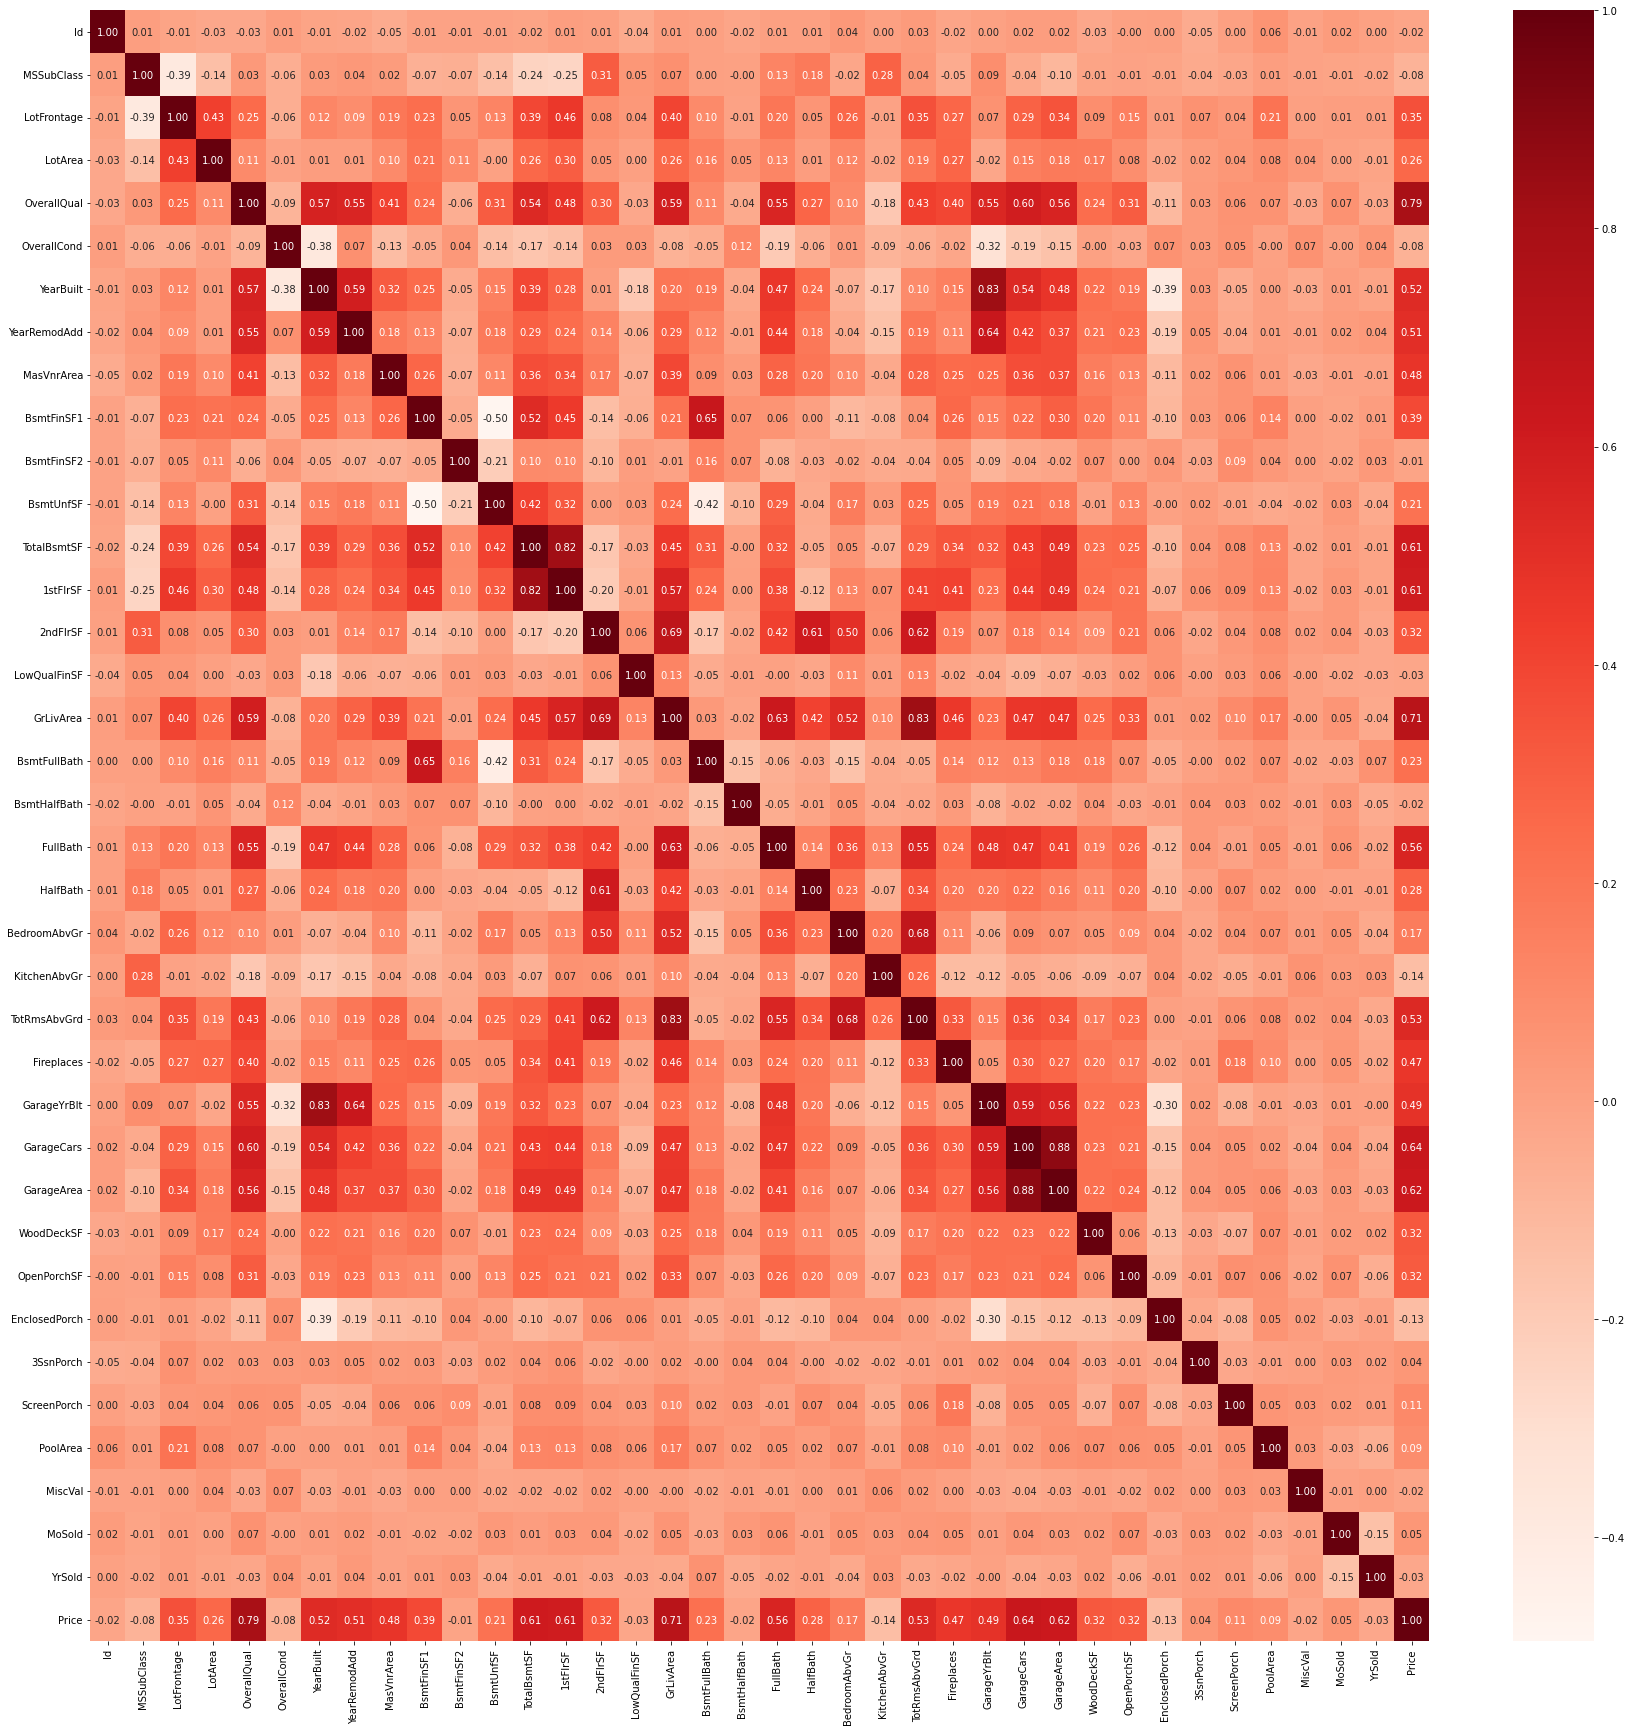

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 30))

cor = df.corr()

sns.heatmap(cor, annot = True, cmap = plt.cm.Reds, fmt ='.2f')

plt.show()

In [21]:
# corelatia cu variabile
cor_target = abs(cor['Price'])

#selectarea caracteristicelor strins corelate cu Price
relevant_feature = cor_target[cor_target > 0.5]
relevant_feature

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
Price           1.000000
Name: Price, dtype: float64

### Wrapper Method
#### Forward Selection

In [29]:
# upload the model
from sklearn.datasets import fetch_california_housing

x = fetch_california_housing(as_frame=True)

df = pd.DataFrame(x.data, columns= x.feature_names)

df['Price'] = x.target
X = df.drop('Price', 1)
y = df['Price']

C:\Users\user\AppData\Local\Temp\ipykernel_32916\3929069957.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('Price', 1)


In [37]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.linear_model import LinearRegression

#sequal forward selection
sfs = SFS(
        LinearRegression(),
        k_features= 5,
        forward=True,
        floating=False,
        scoring='r2',
        cv = 0
)

In [38]:
sfs.fit(X, y)
sfs.k_feature_names_

('MedInc', 'HouseAge', 'AveBedrms', 'Latitude', 'Longitude')

### Backward Elimination

In [39]:
#sequal forward selection
sbs = SFS(
        LinearRegression(),
        k_features= 5,
        forward=False,
        floating=False,
        scoring='r2',
        cv = 0
)
sbs.fit(X, y)
sbs.k_feature_names_

('MedInc', 'HouseAge', 'AveBedrms', 'Latitude', 'Longitude')

### Embedded Method

In [40]:
# load the data
from sklearn.datasets import load_breast_cancer

x = load_breast_cancer()

df = pd.DataFrame(x.data, columns= x.feature_names)

df['Diagnosis'] = x.target

X = df.drop('Diagnosis', 1)
y = df['Diagnosis']

df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_32916\2897479832.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('Diagnosis', 1)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [41]:
from sklearn.linear_model import LassoCV # embeded method

reg = LassoCV(cv = 5, random_state=0).fit(X, y)

In [43]:
print('Best alpha unsing built-in LassoCV: %f' % reg.alpha_)
print('Best alpha unsing built-in LassoCV: %f' % reg.score(X, y))

Best alpha unsing built-in LassoCV: 0.201830
Best alpha unsing built-in LassoCV: 0.661795


In [44]:
coef = pd.Series(reg.coef_, index= X.columns)
coef

mean radius               -0.000000
mean texture              -0.000000
mean perimeter            -0.000000
mean area                  0.000271
mean smoothness           -0.000000
mean compactness          -0.000000
mean concavity            -0.000000
mean concave points       -0.000000
mean symmetry             -0.000000
mean fractal dimension    -0.000000
radius error              -0.000000
texture error             -0.000000
perimeter error           -0.000000
area error                -0.000000
smoothness error          -0.000000
compactness error         -0.000000
concavity error           -0.000000
concave points error      -0.000000
symmetry error            -0.000000
fractal dimension error   -0.000000
worst radius              -0.000000
worst texture             -0.008351
worst perimeter           -0.017480
worst area                 0.000255
worst smoothness          -0.000000
worst compactness         -0.000000
worst concavity           -0.000000
worst concave points      -0

In [48]:
# aici am pus sa arate toate care difera de zero
print('Lasso picked: ' +str(sum(coef != 0)) + ' variables')

print(coef[coef != 0])

print("Lasso eliminated: " + str(sum(coef == 0)) + ' variables')


Lasso picked: 4 variables
mean area          0.000271
worst texture     -0.008351
worst perimeter   -0.017480
worst area         0.000255
dtype: float64
Lasso eliminated: 26 variables
